In [132]:
import os
import tempfile

from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf

tmpdir = tempfile.mkdtemp()

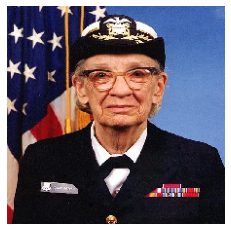

In [133]:
file = tf.keras.utils.get_file(
    "grace_hopper.jpg",
    "https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg")
img = tf.keras.preprocessing.image.load_img(file, target_size=[224, 224])
plt.imshow(img)
plt.axis('off')
x = tf.keras.preprocessing.image.img_to_array(img)

x = tf.keras.applications.mobilenet.preprocess_input(
    x[tf.newaxis,...])


In [134]:
labels_path = tf.keras.utils.get_file(
    'ImageNetLabels.txt',
    'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

In [135]:
pretrained_model = tf.keras.applications.MobileNet()
result_before_save = pretrained_model(x)

decoded = imagenet_labels[np.argsort(result_before_save)[0,::-1][:5]+1]

print("Result before saving:\n", decoded)

Result before saving:
 ['military uniform' 'bow tie' 'suit' 'bearskin' 'pickelhaube']


In [136]:
mobilenet_save_path = os.path.join(tmpdir, "mobilenet/1/")
tf.saved_model.save(pretrained_model, mobilenet_save_path)

INFO:tensorflow:Assets written to: /var/folders/pj/_64wh_0d44z5f2y6mk2zml0w0000gn/T/tmpcuhjrvfr/mobilenet/1/assets


In [137]:
loaded = tf.saved_model.load(mobilenet_save_path)
print(list(loaded.signatures.keys()))  

['serving_default']


In [138]:
infer = loaded.signatures["serving_default"]
print(infer.structured_outputs)

{'predictions': TensorSpec(shape=(None, 1000), dtype=tf.float32, name='predictions')}


In [139]:
print([pretrained_model.output_names[0]])
print(infer)
#print(infer(tf.constant(x)))
print(infer(tf.constant(x))[pretrained_model.output_names[0]])

['predictions']
ConcreteFunction signature_wrapper(*, input_3)
  Args:
    input_3: float32 Tensor, shape=(None, 224, 224, 3)
  Returns:
    {'predictions': <1>}
      <1>: float32 Tensor, shape=(None, 1000)
tf.Tensor(
[[4.05872515e-06 1.65274969e-07 9.42062434e-06 2.04485104e-06
  7.11191433e-06 6.52850929e-07 7.11249015e-08 1.06723391e-07
  4.85389990e-07 1.12751074e-07 1.12291573e-07 2.01140878e-07
  6.93656421e-09 1.08383055e-07 2.07753487e-07 2.51212327e-07
  3.64559405e-08 6.88803681e-08 8.98611142e-06 1.47996695e-06
  7.30223974e-07 3.87615455e-06 6.42708937e-06 3.90815057e-06
  3.26891563e-06 8.73420021e-08 8.70252919e-08 9.15781982e-07
  4.54817109e-06 2.35102231e-08 8.60172065e-07 1.12975329e-06
  2.78440984e-06 7.82100324e-06 7.38938013e-07 5.34851949e-07
  6.21051811e-07 5.97644600e-08 5.17403259e-06 9.98178734e-07
  1.20417525e-07 1.94616838e-08 2.81621073e-08 2.30468885e-07
  2.79045338e-07 2.22404447e-06 5.24974624e-08 2.60981050e-08
  1.65776086e-08 1.65894232e-06 6.815

In [140]:
labeling = infer(tf.constant(x))[pretrained_model.output_names[0]]

decoded = imagenet_labels[np.argsort(labeling)[0,::-1][:5]+1]

print("Result after saving and loading:\n", decoded)

Result after saving and loading:
 ['military uniform' 'bow tie' 'suit' 'bearskin' 'pickelhaube']


In [141]:
imagenet_labels[np.argsort(labeling)[0,::-1][:5]+1]
np.argsort(labeling)[0,::-1][:5]+1

array([653, 458, 835, 440, 716])